#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Miguel Guillermo Galindo Orozco (A01793695)
*   Jorge Iván Hidalgo Reyes (A01794221)
*   Julio Cesar Lynn Jimenez (A01793660)
*   Nicolás Mojica Gómez (A01794354)
*   Marco Antonio Pérez Castellanos (A01793473)


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [52]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, learning_curve, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

#**Ejercicio-1.** 

In [3]:
df = pd.read_csv('SouthGermanCredit.csv')
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [7]:

df.rename(columns={'laufkont':'status','laufzeit':'duration','moral':'credit_history','verw':'purpose','hoehe':'amount',
                   'sparkont':'savings','beszeit':'employment_duration','rate':'installment_rate','famges':'personal_status_sex',
                    'buerge':'other_debtors','wohnzeit':'present_residence','verm':'property','alter':'age','weitkred':'other_installment_plans',
                    'wohn':'housing','bishkred':'number_credits','beruf':'job','pers':'people_liable','telef':'telephone',
                    'gastarb':'foreign_worker','kredit':'credit_risk'}, inplace=True)
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

In [18]:
X = df.loc[:,'status':'foreign_worker']  
y = df.loc[:,'credit_risk']   

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1)

False

#**Ejercicio-3.**

In [30]:
columnas_categoricas = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing']
columnas_ordinales = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits']
columnas_numericas = ['duration', 'amount', 'age']
columnas_binarias = ['people_liable', 'telephone', 'foreign_worker']

# Cada pipeline lleva un paso de Imputación. En el caso de las variables ordinales, únicamente ese paso es el que será aplicado.
# La estrategia seleccionada es la de usar K vecinos cercanos para mantener la importancia del ranking de los valores lo mas parecido posible 
# a otros ejemplos similares en el conjunto de datos.
pipeline_ord = Pipeline(steps = [('imputar', KNNImputer())])  

# 3.b
pipeline_num = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),  
                                 ('escalar', MinMaxScaler(feature_range=(1, 2)))]) # TODO: Revisar en equipo el escalador y los rangos  

# 3.c
pipeline_cat_y_bin = Pipeline(steps = [('imputar', SimpleImputer(strategy='most_frequent')),
                                       ('one-hot', OneHotEncoder(handle_unknown='ignore'))])   

   
transformador = ColumnTransformer(transformers = [('ordinales', pipeline_ord, columnas_ordinales),
                                                  ('numericas', pipeline_num, columnas_numericas),
                                                  ('categoricas y binarias', pipeline_cat_y_bin, columnas_numericas + columnas_binarias)],
                                  remainder='passthrough')
                                    

#**Ejercicio-4.**

In [35]:
def get_models():
  models, names = list(), list()

  models.append(LogisticRegression(solver='liblinear'))
  names.append('Regresión Logística')

  models.append(DecisionTreeClassifier())
  names.append('Árbol de decisión')

  models.append(RandomForestClassifier())
  names.append('Bosque aleatoreo')
  
  return models, names

In [42]:
# accuracy, precision, recall, f1-score y Gmean
def get_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm.ravel()
  accuracy = (vp + vn) / (vp + vn + fp + fn)
  return accuracy

def get_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm.ravel()
  precision = vp / (vp + fp)
  return precision

def get_recall(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm.ravel()
  recall = vp / (vp+fn)
  return recall

def get_f1_score(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm.ravel()
  f1_score = (2 * vp) / (2 * vp + fp + fn)
  return f1_score

def get_gmean(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  vn, fp, fn, vp = cm.ravel()

  recall = vp / (vp+fn)
  especificidad = vn / (vn+fp)

  gmean = np.sqrt(recall * especificidad)
  return gmean


In [45]:
modelos, nombres = get_models()
resultados = list()   

for i in range(len(modelos)):
  nombre = nombres[i]
  modelo = modelos[i]

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  pipeline = Pipeline(steps=[('transformador',transformador),('modelo',modelo)])

  metric = {
    'accuracy':make_scorer(get_accuracy), 
    'precision':make_scorer(get_precision),
    'recall':make_scorer(get_recall),
    'f1-score':make_scorer(get_f1_score),
    'Gmean':make_scorer(get_gmean),
    }

  scores = cross_validate(pipeline, 
                          X_train, y_train,
                          scoring=metric,
                          cv=kfold)
  
  resultados.append(scores)

  mean_accuracy = np.mean(scores['test_accuracy'])
  mean_precision = np.mean(scores['test_precision'])
  mean_recall = np.mean(scores['test_recall'])
  mean_f1_score = np.mean(scores['test_f1-score'])
  mean_gmean = np.mean(scores['test_Gmean'])
  print(f'''>> {nombre}:
    mean Accuracy: {mean_accuracy}
    mean Precision: {mean_precision}
    mean Recall: {mean_recall}
    mean f1-score: {mean_f1_score}
    mean G-mean: {mean_gmean}''')

>> Regresión Logística:
    mean Accuracy: 0.7337254901960782
    mean Precision: 0.7831328195556734
    mean Recall: 0.8547405402839102
    mean f1-score: 0.8170368611957478
    mean G-mean: 0.6232758510193058
>> Árbol de decisión:
    mean Accuracy: 0.7172549019607841
    mean Precision: 0.7823391028476899
    mean Recall: 0.8231828324550161
    mean f1-score: 0.8019295866622671
    mean G-mean: 0.6236230644523472
>> Bosque aleatoreo:
    mean Accuracy: 0.7447058823529412
    mean Precision: 0.7501998620808086
    mean Recall: 0.9504628970232162
    mean f1-score: 0.8383598768438404
    mean G-mean: 0.5064450637200145


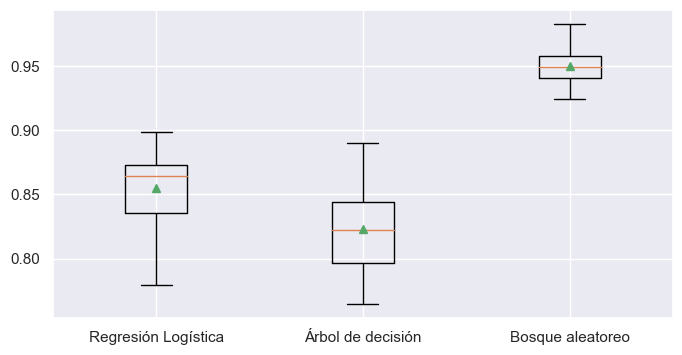

In [46]:
sns.set(rc={'figure.figsize':(8,4)})

cajas = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  cajas.append(rr)

plt.boxplot(cajas, labels=nombres, showmeans=True)

plt.show()

In [47]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

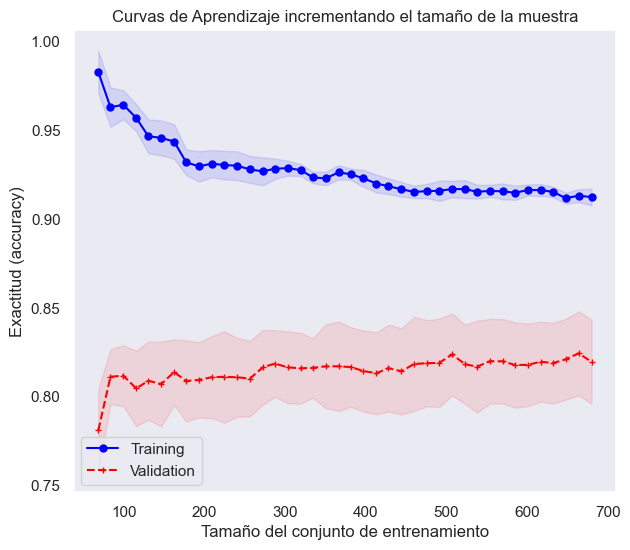

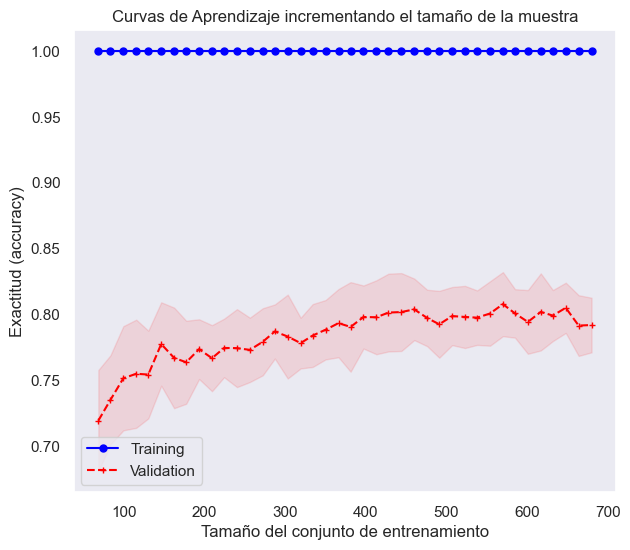

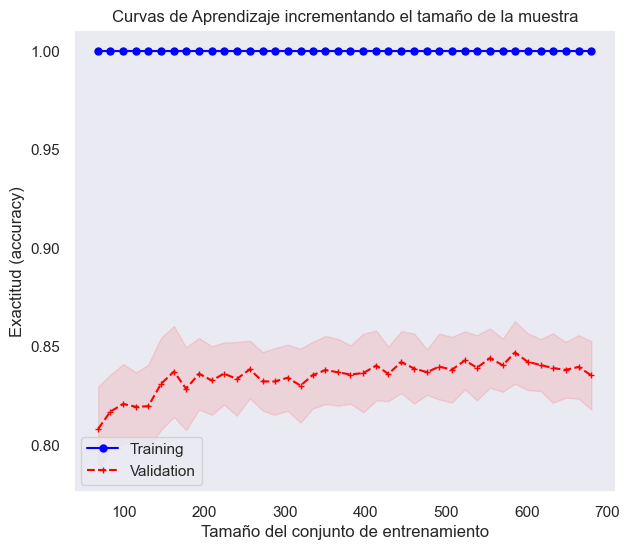

In [50]:
delta_train_sz = np.linspace(.1, 1, 40)

for i in range(len(modelos)):
  nombre = nombres[i]
  modelo = modelos[i]

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  pipeline = Pipeline(steps=[('transformador',transformador),('modelo',modelo)])

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                    X = X_train,
                                                    y = y_train,
                                                    cv = kfold ,
                                                    train_sizes = delta_train_sz,
                                                    scoring=make_scorer(get_f1_score),
                                                    random_state=11)

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

In [51]:
y.shape

(1000,)

#**Ejercicio-5.**

In [ ]:
# a)

modelo = LogisticRegression(solver='liblinear',max_iter=3000)

#Definimos varios diccionarios para evitar combinaciones que no son posibles

# Diccionario para determinar la mejor combinación de los parámetros requeridos , consideremos que no todas las opciones posibles
# de parámetros se pueden combinar por ello seleccionamos solo aquellas posibles
dicc_grid_penalty={'C':np.logspace(-3,3,7),
                   'penalty':['l1','l2'],
                   'class_weight':['balanced', None],
                   'solver':['liblinear','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)


grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid_penalty, 
                    cv=cv, 
                    scoring='f1')

In [ ]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

In [ ]:
# c)
modeloDT = DecisionTreeClassifier()

# Incluiremos los siguientes hiperparametros a la busqueda: ccp_alpha, criterion, max_depth, min_samples_split y class_weigh
dt_param_grid = {'ccp_alpha': [0.1, .01, .001],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': range(1, 10),
                  'min_samples_split': range(1, 10),
                  'class_weigh': ['balanced', None]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

dt_grid = GridSearchCV(estimator=modeloDT, 
                        param_grid=dt_param_grid, 
                        cv=cv, 
                        scoring='precision')

dt_grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', dt_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', dt_grid.best_params_)
print('Métrica utilizada:', dt_grid.scoring)

In [59]:
modeloDT = DecisionTreeClassifier()

dt_param_grid = {'ccp_alpha': [0.1, .01],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': np.arange(1, 3, step=1),
                  'min_samples_split': np.arange(2, 10, step=1),
                  'class_weight': ['balanced', None]}

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state= 8)

Xx = transformador.fit_transform(X_train, y_train)

dt_grid = GridSearchCV(estimator=modeloDT, 
                        param_grid=dt_param_grid, 
                        cv=kfold, 
                        scoring='precision')

dt_grid.fit(Xx, y_train)

print('Mejor valor de exactitud obtenido con la mejor combinación:', dt_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', dt_grid.best_params_)
print('Métrica utilizada:', dt_grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.87689908559873
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: make_scorer(get_precision)


c:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\tools\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and b

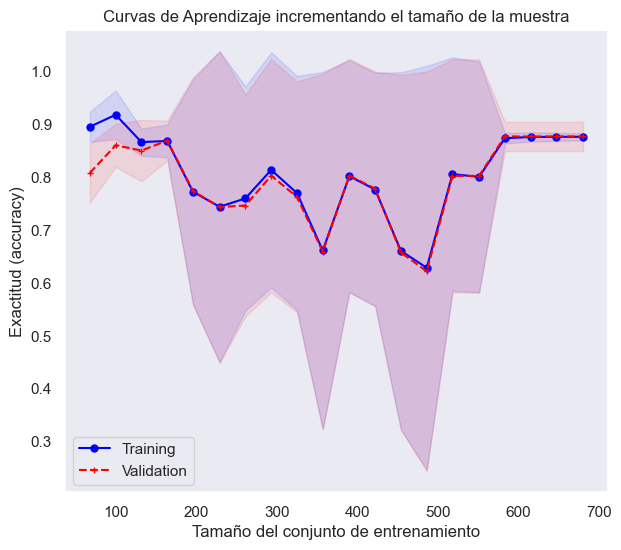

In [61]:
delta_train_sz = np.linspace(0.1, 1.0, 20)

modeloDT = DecisionTreeClassifier(ccp_alpha=0.1, class_weight='balanced', criterion='entropy', max_depth=1, min_samples_split=2)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = modeloDT,    
                                                    X = Xx,
                                                    y = y_train,
                                                    cv = kfold ,
                                                    train_sizes = delta_train_sz,
                                                    scoring='precision',
                                                    random_state=11)

mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**